### Setup

The music analysis that I like to do can be varied and there are number of different tools that I like to use. This notebook will cover the set up and test of what is needed. It will include installing both standard software on the computer's operating system, as well as a number of python libraries that can be installed directly from this notebook.Once that is set up, there are few functions that I will put here, that I use often in music analysis tasks.

I use Docker to install everything and to do that, follow instructions at: 


You should be able to access both the command line and the jupyter notebook

Let's get started!

1. The first thing to do is run   <code>sudo apt-get update</code> in the terminal. This will generally check if things are up to date. 

2. Next, we want to <b>install MuseScore</b>. We wil use this to render the music examples as sheet music view. When installing MuseScore Note that there is a known issue that sometimes an error comes up saying smthing like <i>add-apt-repositorycommand comes up as not found </i>. This just means your computer does not know where to download MuseScore from as its not in standard location it knows about. If this is the case, follow the instructions at: <a href="https://itsfoss.com/add-apt-repository-command-not-found/">https://itsfoss.com/add-apt-repository-command-not-found/</a>. To get around this just run ther following commands, after each other. 
<br/><br/><code>sudo apt-get install software-properties-common</code> followed by 
<br/><code>sudo apt-get update</code>
<br/><br/>Now we can get back to the install process. The first command below lets linux know that there a location it can get MuseScore from. The second updates the linux system with this information, and the third installs it.<br/><br/>
 <code>sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable</code><br/>
  <code>sudo apt-get install musescore</code> <br/> <br/>
  
3. Next, <b>install FluidSynth</b>. There are lots of uses for this but we will use it to help with creating sound files. Just run the following, again at the command line terminal: <br/><br/>
<code>sudo apt-get install fluidsynth</code>



4. TInstall a bunch of python libraries. Specifically we need: 
- <b>music21</b>: This is a general purpose music analysis library, very handy for searching through music scores and works well with standard formats such as musicXML and midi<br/>
- <b>librosa</b>: This is a library for DSP type analysis, customised towoards music
- <b>midi2Audio, pyFluidsynth</b>: These are some wrapper libraries around FluidSynth and handy to use to interact with sound 
- <b>itables</b>: a handy library to make our data frames easily searchable <br/>


You can do all this directly from the notebook. Just uncomment the code below in the next cell and run it to get what we need. The version of JupyterLab we have installed with this Docker image already comes lots of other data manipulation libraries, so its only these extra ones we need:  <br/>




In [19]:
# !pip install music21
# !pip install librosa
# !pip install midi2audio
# !pip install pyFluidSynth
# !pip install itables
#!pip install MIDIUtil

Now let's test that everything ready to go. Import the following libraries to check if eveything we need. Note that, as well as the libraries I have added above, there are bunch of others that I will be using to data analysis and visualization tasks. The most important thing is that this runs. In the cell below I will also tell the notebook where the location of MuseScore is as it needs to know this to render sheet music images. 

In [15]:
import librosa
import music21 as mu
from midi2audio import FluidSynth
import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import HTML, IFrame, Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import itables as it
from itables import init_notebook_mode
import IPython

init_notebook_mode(all_interactive=True)

# update music21 environment so it can find MuseScore
mu.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')



<IPython.core.display.Javascript object>

Now, let's test things out. Start by making sure itables gives a nice interactive searchable table rather than the standard Pandas data frame

In [8]:
from itables import init_notebook_mode
import itables as it

init_notebook_mode(all_interactive=True)

d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
it.show(df, column_filters="header", dom="lrtip", maxBytes=0)

<IPython.core.display.Javascript object>

Loading... (need help?)


Now check music21 is working by doing the following: 

Time to check everything is working: <br/>
1. Import a musicXML file to music21

In [9]:
example_1 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")

2. Create a small phrase in music 21 and render to sheet music view

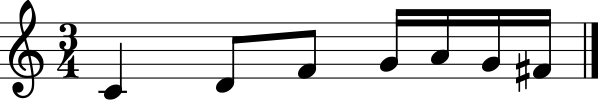

In [10]:
example_2 = mu.converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
example_2.show()

3. Try another example

In [11]:
violinSound = mu.instrument.Violin()
exampleForAudio = mu.stream.Stream()
exampleForAudio.append(violinSound)

n1 = mu.note.Note('c4')
n2 = mu.note.Note('d4')
n3 = mu.note.Note('f5')
exampleForAudio.append([n1, n2, n3])


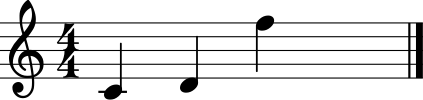

In [12]:
exampleForAudio.show()

Now check that we can create some musical phrases with Music21, and then convert this into a playable sample. Note that Music21 has functionality for this, but there is currently a limitation in JupyterLab related to the music21 <code>.show('midi')</code> command and a player does not render. To get around this, I use a small function below, which converts any given example (such as example_1 or example_2 above) to an mp3 file and create a playback widget. There are more elegant ways to do this,but this works and I also like to mp3 sound files of examples. Note that this function will create files in your directory so you either delete them after playing the example, or keep them in a different directory

In [16]:
def create_sound_file_from_midi(m21_data, file_name):
    m21_data.write('midi', fp = file_name + ".mid")
    fs = FluidSynth()
    fs.midi_to_audio('./' + file_name + ".mid", file_name + '.mp3')
    return(IPython.display.Audio("./" + file_name + ".mp3"))

In [17]:
    create_sound_file_from_midi(exampleForAudio, "example_3")

Finally, check librosa is working by running a code example from the librosa docs

In [18]:
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 107.67 beats per minute


Now that everything works, the final thing to do in this notebook is to list out some handy functions that I like to use (things like, converting music data into a easily searchable list, or a visualisation to show which instruments are playing). They are listed as functions below which you can paste into any notebook to start doing analysis